In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics




In [2]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [10]:
# Logistic Regression
logistic_model = LogisticRegression(max_iter=30)
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)
logistic_accuracy = metrics.accuracy_score(y_test, logistic_pred)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


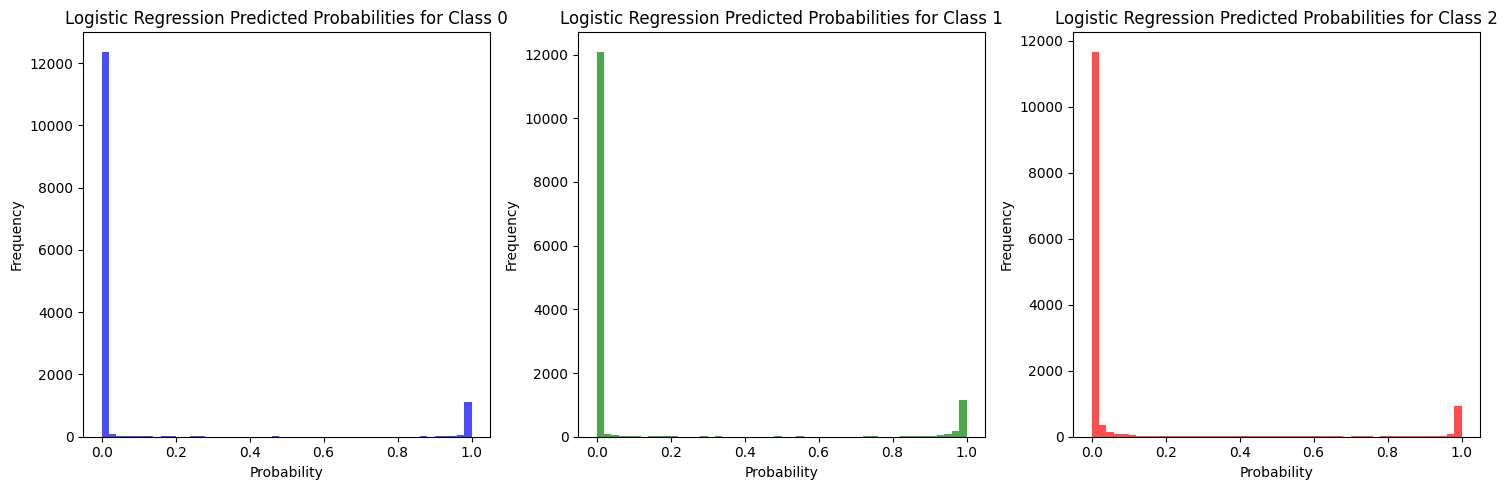

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Logistic Regression Predicted Probabilities
logistic_probs = logistic_model.predict_proba(X_test)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Logistic Regression Predicted Probabilities for Class 0
axes[0].hist(logistic_probs[:, 0], bins=50, color='blue', alpha=0.7)
axes[0].set_title('Logistic Regression Predicted Probabilities for Class 0')
axes[0].set_xlabel('Probability')
axes[0].set_ylabel('Frequency')

# Logistic Regression Predicted Probabilities for Class 1
axes[1].hist(logistic_probs[:, 1], bins=50, color='green', alpha=0.7)
axes[1].set_title('Logistic Regression Predicted Probabilities for Class 1')
axes[1].set_xlabel('Probability')
axes[1].set_ylabel('Frequency')

# Logistic Regression Predicted Probabilities for Class 2
axes[2].hist(logistic_probs[:, 2], bins=50, color='red', alpha=0.7)
axes[2].set_title('Logistic Regression Predicted Probabilities for Class 2')
axes[2].set_xlabel('Probability')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [4]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
logistic_cm = confusion_matrix(y_test, logistic_pred)
logistic_cr = classification_report(y_test, logistic_pred)

In [8]:
print("Logistic Regression Classification Report:\n", logistic_cr)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      1343
           1       0.92      0.96      0.94      1600
           2       0.89      0.85      0.87      1380
           3       0.85      0.86      0.85      1433
           4       0.88      0.90      0.89      1295
           5       0.85      0.77      0.81      1273
           6       0.88      0.94      0.91      1396
           7       0.91      0.90      0.90      1503
           8       0.82      0.83      0.82      1357
           9       0.87      0.86      0.87      1420

    accuracy                           0.88     14000
   macro avg       0.88      0.88      0.88     14000
weighted avg       0.88      0.88      0.88     14000



Logistic Regression Accuracy: 0.9165


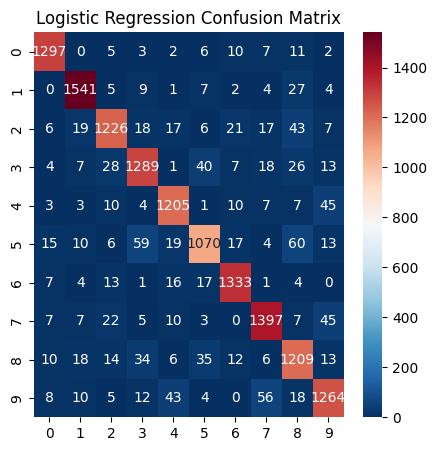

In [11]:

fig, axes = plt.subplots(1, 1, figsize=(5, 5))

# Displaying confusion matrix
logistic_cm = confusion_matrix(y_test, logistic_pred)
sns.heatmap(logistic_cm, annot=True, fmt='d', cmap='RdBu_r', ax=axes)
axes.set_title('Logistic Regression Confusion Matrix')
print("Logistic Regression Accuracy:", logistic_accuracy)
plt.show()
